In [1]:
!pip install xgboost

In [2]:

import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

import torch

In [3]:
#stock analysis 


day = 2
start = datetime.datetime(2022,1,day)
end = datetime.datetime(2022,4,1)

#for future stocks 

from datetime import datetime, timedelta
start_date = datetime(2022, 5, 2)
end_date = datetime(2022, 8, 27)
    
dates = pd.date_range(start_date,end_date-timedelta(days=1),freq='d')



In [4]:
stock = [] 
i = 'CL=F'
stock = yf.download(i, start = start, end = end, progress = False) 

In [5]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,75.690002,76.459999,74.269997,76.080002,76.080002,317628
2022-01-04,76.019997,77.639999,75.699997,76.989998,76.989998,372848
2022-01-05,77.180000,78.580002,76.510002,77.849998,77.849998,397898
2022-01-06,77.239998,80.239998,76.730003,79.459999,79.459999,476665
2022-01-07,79.620003,80.470001,78.519997,78.900002,78.900002,414434


In [6]:
stock = yf.download(i, start = start, end = end, progress = False) 

In [7]:
bought_price = stock['Adj Close']


In [8]:
bought_price = bought_price[0]
bought_price

76.08000183105469

In [9]:
import datetime

In [10]:
stock.reset_index(inplace=True)


In [11]:
stock['year'] = pd.DatetimeIndex(stock['Date']).year
stock['month'] = pd.DatetimeIndex(stock['Date']).month
stock['day'] = pd.DatetimeIndex(stock['Date']).day
stock['year'] = pd.DatetimeIndex(stock['Date']).year

In [12]:
# lets try to predict the adjusted close with just the day and month

In [13]:
stock_copy = stock 

stock = stock[['month', 'day','year',  'Adj Close']]

#simple pipeline
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
y = stock['Adj Close'] 
x = stock.drop('Adj Close', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 24, 
                                                    shuffle = False)

from sklearn.ensemble import RandomForestRegressor

param_grid = { 
    'n_estimators': [200, 500, 1000, 2000, 5000], 
    'max_depth': [10,  50, 110, None]
}
from sklearn.model_selection import GridSearchCV

    




In [14]:
model = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid, cv = 3)

    
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 50, 110, None],
                         'n_estimators': [200, 500, 1000, 2000, 5000]})

In [15]:
y_pred = model.predict(X_test)
    
    

In [16]:
# lets see how accurate it actually is 

In [17]:
import seaborn as sns 

df = pd.DataFrame(X_test)
df['Actual'] = y_test
df['Predicted'] = y_pred 
df.head()

,month,day,year,Actual,Predicted
56,3,24,2022,112.339996,113.484681
57,3,25,2022,113.900002,113.484681
58,3,28,2022,105.959999,113.484681
59,3,29,2022,104.239998,113.484681
60,3,30,2022,107.820000,113.484681


In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, y_test)

#how much the price is off by 

6.304234049115863

In [19]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [20]:
MAPE(y_pred, y_test)

0.05614979861326449

In [21]:
#Percent Difference -  (Value1 - Value2)/Value1   * 100 
#So if I want to see the percent my investment changed relative to the price I bought it at 

predicted_percent = ((df['Predicted'] - bought_price)/df['Predicted']) * 100

df['Predicted Percent Change'] = predicted_percent
predicted_percent = ((df['Actual'] - bought_price)/df['Actual'])* 100

df['Actual Percent Change'] = predicted_percent
df.head()

#lets see on average how much the stock is off 

,month,day,year,Actual,Predicted,Predicted Percent Change,Actual Percent Change
56,3,24,2022,112.339996,113.484681,32.960113,32.277012
57,3,25,2022,113.900002,113.484681,32.960113,33.204565
58,3,28,2022,105.959999,113.484681,32.960113,28.199318
59,3,29,2022,104.239998,113.484681,32.960113,27.014578
60,3,30,2022,107.820000,113.484681,32.960113,29.437950


In [22]:
#####


mean_absolute_error(df['Predicted Percent Change'], df['Actual Percent Change'])



#####

4.140770283461925

In [23]:
df = df.sort_values(by = ['month','day'])

df['Datetime'] = pd.to_datetime( df[['year', 'month', 'day']])

df

,month,day,year,Actual,Predicted,Predicted Percent Change,Actual Percent Change,Datetime
56,3,24,2022,112.339996,113.484681,32.960113,32.277012,2022-03-24
57,3,25,2022,113.900002,113.484681,32.960113,33.204565,2022-03-25
58,3,28,2022,105.959999,113.484681,32.960113,28.199318,2022-03-28
59,3,29,2022,104.239998,113.484681,32.960113,27.014578,2022-03-29
60,3,30,2022,107.820000,113.484681,32.960113,29.437950,2022-03-30
61,3,31,2022,100.279999,113.484681,32.960113,24.132426,2022-03-31
62,4,1,2022,99.269997,106.200902,28.362188,23.360527,2022-04-01


In [24]:

year = pd.DatetimeIndex(dates).year
month = pd.DatetimeIndex(dates).month
day = pd.DatetimeIndex(dates).day

date_columns = ['month', 'day', 'year'] 

future_dates = pd.DataFrame({'month': month, 'day': day, 'year': year}, columns = date_columns)




In [25]:
future_predict = model.predict(future_dates)
future_dates['projected values'] = future_predict


In [26]:
future_dates.head()

,month,day,year,projected values
0,5,2,2022,108.997810
1,5,3,2022,108.990709
2,5,4,2022,113.087020
3,5,5,2022,113.951690
4,5,6,2022,118.419631


In [27]:
future_dates['percent change'] = ((future_dates['projected values'] - bought_price)/(future_dates['projected values'])) * 100 

In [28]:
future_dates['DateTime'] = dates
future_dates

,month,day,year,projected values,percent change,DateTime
0,5,2,2022,108.997810,30.200431,2022-05-02
1,5,3,2022,108.990709,30.195883,2022-05-03
2,5,4,2022,113.087020,32.724373,2022-05-04
3,5,5,2022,113.951690,33.234863,2022-05-05
4,5,6,2022,118.419631,35.753894,2022-05-06
...,...,...,...,...,...,...
112,8,22,2022,111.791652,31.944827,2022-08-22
113,8,23,2022,113.484681,32.960113,2022-08-23
114,8,24,2022,113.484681,32.960113,2022-08-24
115,8,25,2022,113.484681,32.960113,2022-08-25


In [29]:
df.to_excel('Stock_info.xlsx')
future_dates.to_excel('Future_stock_prices4.xlsx')

In [30]:
import matplotlib.pyplot as plt
import numpy as np



df_temp = df[['Predicted Percent Change', 'Actual Percent Change']]


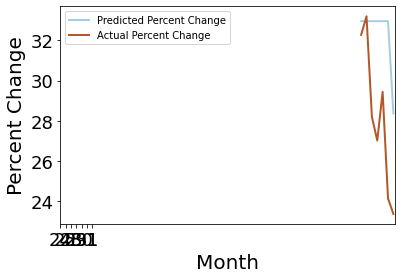

In [31]:
df_temp.plot(colormap='Paired', linewidth=2, fontsize=18)

plt.xlabel('Month', fontsize=20)
plt.ylabel('Percent Change', fontsize=20)
x = df['day'] 
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)


plt.show()

#need to find a way to fix the time series... 

In [32]:
# now lets look at it for the predicted price 

In [33]:
future_dates_temp= future_dates[['percent change']] 

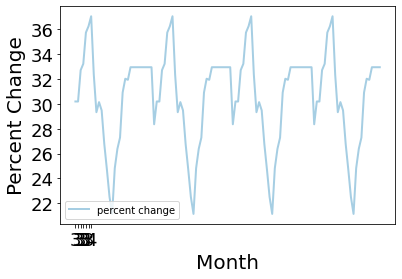

In [34]:
future_dates_temp.plot(colormap='Paired', linewidth=2, fontsize=18)

plt.xlabel('Month', fontsize=20)
plt.ylabel('Percent Change', fontsize=20)
x = df['month'] 
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.show()

In [35]:
# lets see how much we would have hyothetically had made with a $1000 investment 

investment = 1000 

#based on my projected values 5/6 seems one of the more optimal times to buy 
#lets get what price it actually is 

start_updated = datetime.datetime(2022,5,1)
end_updated = datetime.datetime(2022,5,6)


chosen_sell_date = yf.download(i, start = start_updated, end = end_updated, progress = False) 
sell_date = chosen_sell_date['Adj Close']
sell_date = sell_date[-1]
sell_cost = sell_date
sell_cost


109.7699966430664

In [36]:
#what the adjusted close price when we bought it: 
bought_price

76.08000183105469

In [37]:
#lets get the percent differebce 
percent_dif = ((sell_cost - bought_price)/(sell_cost)) 
percent_dif

0.3069144196256085

In [38]:
profit = (investment * percent_dif)
profit

306.9144196256085